# Principal Component Analysis

Principal component analysis (PCA) is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

Please refer following sections of [ML - Support Vector Machines Notebook](ML - Support Vector Machines.ipynb) - 

 - [Face Recognition with SVM](ML - Support Vector Machines.ipynb#Face-Recognition-with-SVM)
 - [One More Example of Chaining PCA and SVM](ML - Support Vector Machines.ipynb#One-More-Example-of-Chaining-PCA-and-SVM)
 
 
Some good resources from Internet about PCA - 

 - [Making Sense of PCA, Eigenvectors and Eigenvalues](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues) This one is very good. 
 - [Understanding Principal Components Analysis](https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0)
 - [A One-Stop for Principal Componenents Analysis](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)
 - [Principal Components Analysis - Sebastian Raschka](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

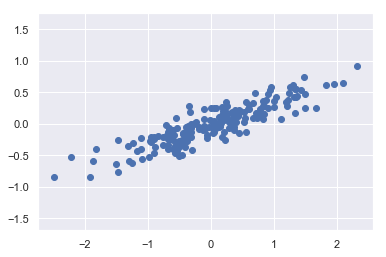

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [2]:
X.shape,

((200, 2),)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

print(pca.components_,'\n')
print(pca.explained_variance_, '#components explained variance\n')
print('Explained variance ratio: ',pca.explained_variance_ratio_,'#sum of these ratio is 1 as no of comp = no of features.\n')
print('no of featurses: ',pca.n_features_,'\n')
print('Mean: ',pca.mean_,'\n')
print('Ist comp var ratio',0.7625315/(0.7625315+0.0184779)) #Ratio of variance explained by 1st component to var. exp. all component

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]] 

[0.7625315 0.0184779] #components explained variance

Explained variance ratio:  [0.97634101 0.02365899] #sum of these ratio is 1 as no of comp = no of features.

no of featurses:  2 

Mean:  [ 0.03351168 -0.00408072] 

Ist comp var ratio 0.9763410017856379


We have `pca.components_= [[-0.94446029 -0.32862557],[-0.32862557  0.94446029]]`
 
This means that first feature has the score of -0.94446029 on First Component and score of -0.32862557 on Second Component. Similarily, second feature has the score of -0.32862557 on First Component and score of 0.94446029 on Second Component.

**This value tells us 'how much' the feature influences the PC.**

So the higher the value in absolute value, the higher the influence on the principal component. Also the sum of square of these values for each feature is equal to 1. 

As for the sign of these values, they show the direction of pull. For first feature, the direction is pointing toward `-x` and `-y`. Similarily, for second feature, the direction of pull is toward `-x` and `+y`. 

In [4]:
.94446029*.94446029+.32862557*.32862557


1.0000000046447088

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:


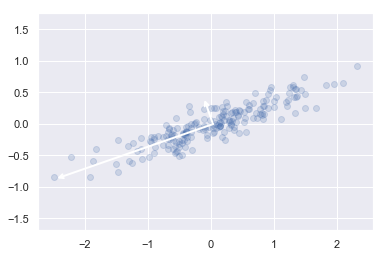

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

    
    
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

In [6]:
x_pca = pca.transform(X)
x_new = pca.inverse_transform(x_pca)

`pca.inverse_transform?` ==> transform back to original form. Opposite of transform.

In [7]:
import pandas as pd
df = pd.DataFrame(x_pca, columns = ['X1','X2'])
df.head()

,X1,X2
0,0.676769,0.059739
1,-1.071214,0.257240
2,0.727912,-0.168670
3,2.309641,0.244067
4,0.630052,-0.304656


In [8]:
df.var() #same as calcuated above as pca.explained_variance_

X1    0.762532
X2    0.018478
dtype: float64

In [9]:
df.std()

X1    0.873230
X2    0.135933
dtype: float64

In [10]:
np.mean(X[:,0]), np.mean(X[:,1]) #same as calculated earlier by pca.mean_ (original data)

(0.03351168029353147, -0.004080717591626834)

In [11]:
df.mean() # approximately equals to zero

X1    8.049117e-18
X2    1.151856e-17
dtype: float64

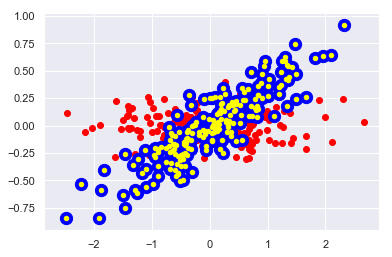

In [12]:
plt.scatter(x_pca[:,0], x_pca[:,1], color = 'red')           #transformed features
plt.scatter(x_new[:,0], x_new[:,1],s
            =150, color = 'blue')   #recovered truth from tranformed features
plt.scatter(X[:,0], X[:,1], s = 20, color = 'yellow');       #original features

In [13]:
df_orig = pd.DataFrame(X, columns = ['x1', 'x2'])
df_orig.head()

,x1,x2
0,-0.625302,-0.170064
1,0.960695,0.590901
2,-0.598543,-0.402593
3,-2.228059,-0.532577
4,-0.461430,-0.498867


Text(0.5, 1.0, 'Original data')

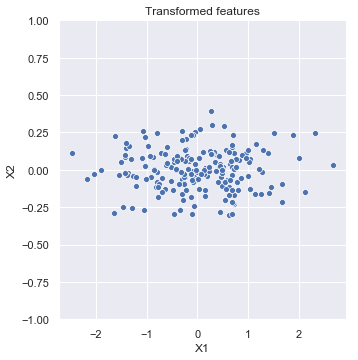

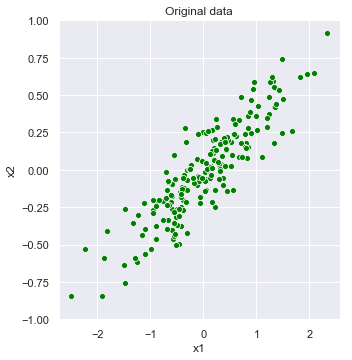

In [14]:
sns.relplot('X1', 'X2',data = df, kind = 'scatter')
plt.ylim(-1,1)
plt.title('Transformed features')
sns.relplot('x1', 'x2',data = df_orig, kind = 'scatter', color = 'green')
plt.ylim(-1,1)
plt.title('Original data')

In below example, we have chosen to go for only 1 component and thereby we reduced to dimensionality from 2 (of original data) to 1. 

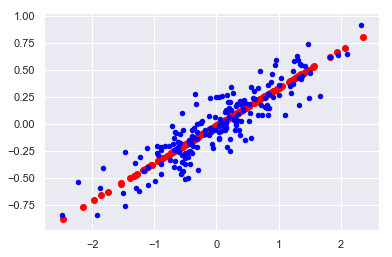

In [15]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
pca1.fit(X)
X_pca1 = pca1.transform(X)
X_1 = pca1.inverse_transform(X_pca1)

plt.scatter(X_1[:,0], X_1[:,1], color = 'red')      #recoverd dataset from transformed dataset    
plt.scatter(X[:,0], X[:,1], s = 20, color = 'blue'); #Original dataset

In [16]:
print(pca1.components_,'\n')
print(pca1.explained_variance_, '#components explained variance\n')
print('Explained variance ratio: ',pca1.explained_variance_ratio_,'#sum of these ratio is 1.\n')
print('no of featurses: ',pca1.n_features_,'\n')
print('Mean: ',pca1.mean_,'\n')
print('Ist comp var ratio',0.7625315/(0.7625315+0.0184779)) #Ratio of variance explained by 1st component to var. exp. all component

[[-0.94446029 -0.32862557]] 

[0.7625315] #components explained variance

Explained variance ratio:  [0.97634101] #sum of these ratio is 1.

no of featurses:  2 

Mean:  [ 0.03351168 -0.00408072] 

Ist comp var ratio 0.9763410017856379


### Another Example of PCA

In [17]:
import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

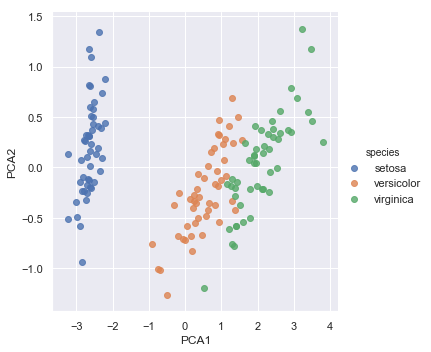

In [18]:
# a complete example of unsupervised learning: Iris dimensionality reduction

from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### PCA analysis for Boston Data

In [19]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [20]:
print(data.feature_names)
print(data.data.shape)
print((data.data)[:2].round(3))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
[[6.000e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
 [2.700e-02 0.000e+00 7.070e+00 0.000e+00 4.690e-01 6.421e+00 7.890e+01
  4.967e+00 2.000e+00 2.420e+02 1.780e+01 3.969e+02 9.140e+00]]


In [21]:
features = data.data
features[:,0][:7]

array([0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829])

In [22]:
%matplotlib inline
n = 13
import matplotlib.pyplot as plt
import pandas as pd
df =  pd.DataFrame(features)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
df.columns = data.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
from sklearn.decomposition import PCA
model = PCA(n_components = 1)
model.fit(df)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
model.components_, model.explained_variance_,model.explained_variance_ratio_,model.noise_variance_


(array([[ 2.92973218e-02, -4.35898000e-02,  2.83309382e-02,
         -5.55846350e-05,  4.49721818e-04, -1.16815860e-03,
          8.36335746e-02, -6.56163360e-03,  4.50053753e-02,
          9.49741169e-01,  5.60011721e-03, -2.91218514e-01,
          2.29433756e-02]]),
 array([30889.91126082]),
 array([0.80582318]),
 620.2875386909054)

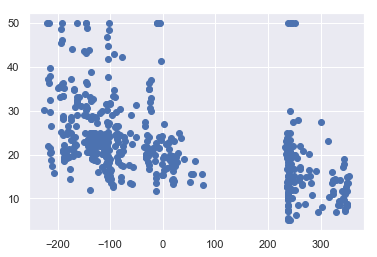

In [26]:
X_boston =  model.transform(df)
plt.scatter(X_boston, data.target)

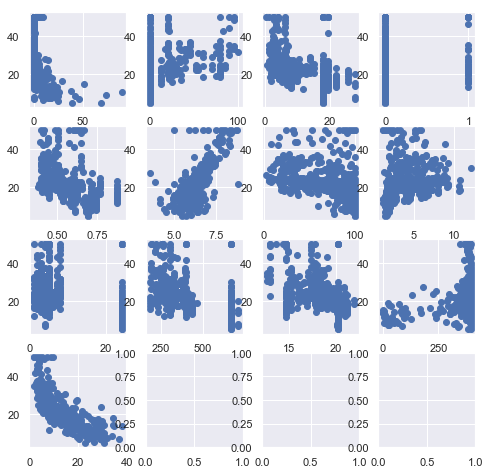

In [27]:
fig, ax = plt.subplots(4,4, figsize = (8,8))
ax =ax.ravel()
b = zip(ax, df.columns)
a = list(b)
for c,d in a:
    c.scatter(df[d],data.target)


In above case, we didn't standardized the data. Let us repeat the process with data standardized.


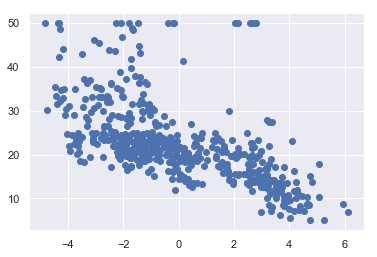

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit_transform(df)
from sklearn.decomposition import PCA
model = PCA(n_components = 1)
model.fit(scaler)
n_model = model.transform(scaler)
plt.scatter(n_model, data.target)

This result is slightly better than the result we got when data wasn't standardized.


In [29]:
model.explained_variance_,model.n_components_

(array([6.1389812]), 1)

In above 2 cases of PCA, analyses, we explicitly chose the number of component (`n_components_` = 1). However, we can let PCA choose the number of components so that it may explain the variance of our choice.

For example, we want to choose the number of components such that the explained variance should be at least 95%.


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit_transform(df)
from sklearn.decomposition import PCA
model = PCA(.95)
model.fit(scaler)
print("No of comp:", model.n_components_)
print("Explained variance: ", model.explained_variance_.round(3))
print("Sum of Explained variance: ",sum(model.explained_variance_.round(3)))
print("Explained variance ration", model.explained_variance_ratio_.round(3))
print("Sum of Expl. Var. Ratio", sum(model.explained_variance_ratio_.round(3))) #sum is .95 because this is what we wanted
for i in model.explained_variance_:
    print(i/sum(model.explained_variance_))

No of comp: 9
Explained variance:  [6.139 1.436 1.245 0.859 0.836 0.659 0.536 0.397 0.277]
Sum of Explained variance:  12.384
Explained variance ration [0.471 0.11  0.096 0.066 0.064 0.051 0.041 0.03  0.021]
Sum of Expl. Var. Ratio 0.9500000000000001
0.4956622248063558
0.11595199358536479
0.10052772023400328
0.06937784790591851
0.06753663037042146
0.053184257093935976
0.043310320891528566
0.03204428274477179
0.022404722367699963


In [31]:
import numpy as np
np.var(scaler)

0.9999999999999989

### Dimensionality Reduction : Manifold Learning


Below we introduce another way for dimensionality reduction.

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

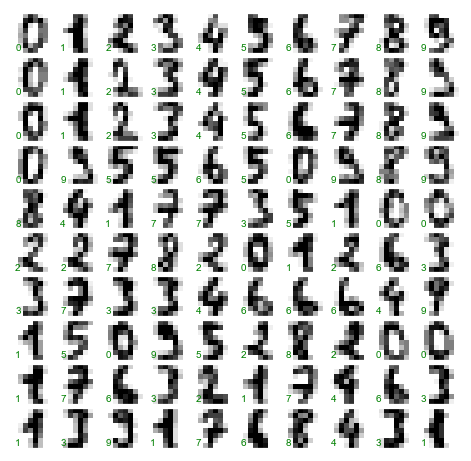

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [34]:
X = digits.data
print(X.shape)
y = digits.target
print(y.shape)

(1797, 64)
(1797,)


In [35]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

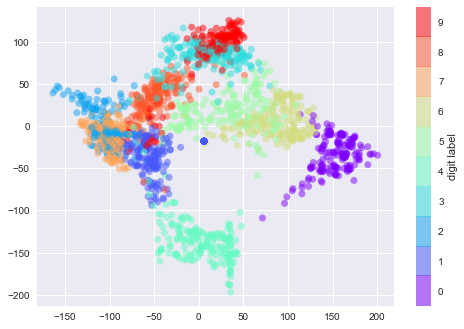

In [38]:
plt.style.use('seaborn')
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);